In [453]:
import time
import warnings

import random
import sys

import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import RangeIndex
import collections
from sklearn import cluster, datasets, neighbors
import pickle

try:
    import Queue as Q  
except ImportError:
    import queue as Q

np.random.seed(0)

In [443]:

# Generate datasets
n_samples = 1500
random_state = 170

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
 
blobs = datasets.make_blobs(n_samples=n_samples, random_state=7)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)


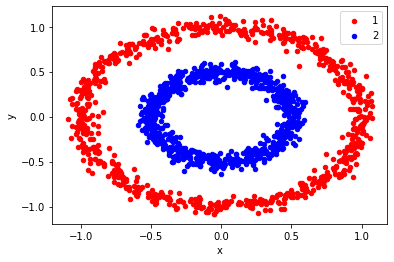

In [444]:
# Circles dataset
X_circles = noisy_circles
points = X_circles[0]
labels = X_circles[1]+1

df_circles = DataFrame(dict(x=points[:,0], y=points[:,1], label=labels))
colors = {1:'red', 2:'blue'}
fig, ax = plt.subplots()
grouped = df_circles.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

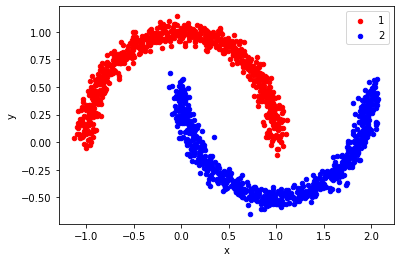

In [445]:
# Moons dataset
X_moons = noisy_moons
points = X_moons[0]
labels = X_moons[1]+1

df_moons = DataFrame(dict(x=points[:,0], y=points[:,1], label=labels))
colors = {1:'red', 2:'blue'}
fig, ax = plt.subplots()
grouped = df_moons.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

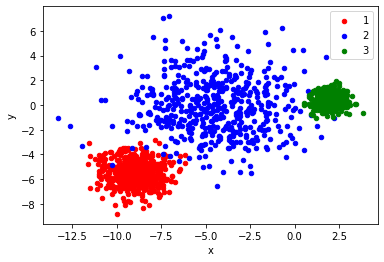

In [446]:
X_varied = varied

points=X_varied[0]
labels=X_varied[1]+1


df_varied = DataFrame(dict(x=points[:,0], y=points[:,1], label=labels))
colors = {0:'black', 1:'red', 2:'blue', 3:'green'}
fig, ax = plt.subplots()
grouped = df_varied.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

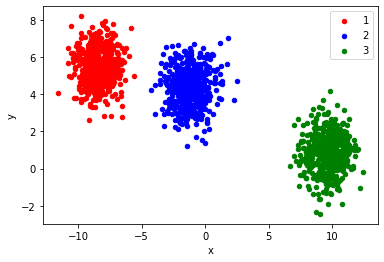

In [447]:
X_blobs = blobs

points=X_blobs[0]
labels=X_blobs[1]+1


df_blobs = DataFrame(dict(x=points[:,0], y=points[:,1], label=labels))
colors = {0:'black', 1:'red', 2:'blue', 3:'green'}
fig, ax = plt.subplots()
grouped = df_blobs.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


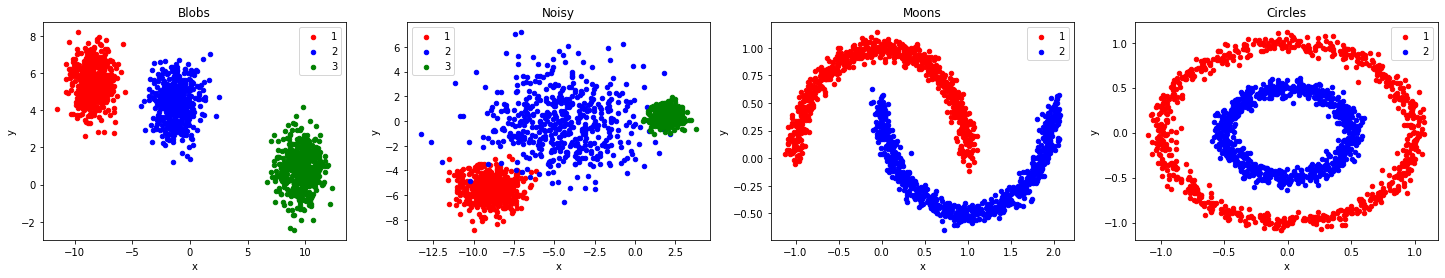

In [448]:
df_lis=list()
# df_lis.append(["Original", df_blobs])
df_lis.append(["Blobs"   , df_blobs])
df_lis.append(["Noisy"   , df_varied])
df_lis.append(["Moons"   , df_moons])
df_lis.append(["Circles" , df_circles])


fig, axs = plt.subplots(1, 4, figsize = (25, 4))
plt.gray()

for i, ax in enumerate(axs.flat):
    
    grouped = df_lis[i][1].groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
    ax.set_title(df_lis[i][0])

fig.show()


# K-Center

In [135]:
# K-Center
# Params:
#     P is the set of points
#     k number of centers
# Return:
#     center set with index for centroids
#     points set with cluster
def k_center_clustering(P,k):
    total_points, coords = P.shape
    centers = list()
    
    
    # Copy and add new columns to save the cluster and distance to that cluster
    points=P.copy()
    
    dist = np.matrix(np.ones((total_points,1)) * np.inf)
    cluster = np.zeros((total_points,1))
    
    points = np.hstack((points,cluster,dist))
    
    points_rows,points_col=points.shape
    
    # Pick the first center
    seedValue = (random.randrange(sys.maxsize))//2**32
    np.random.seed(seedValue)
    c_index = np.random.randint(low=0, high=total_points,size =(1))
    
    
    # Add point to centers set
    centers.append(c_index[0])
    
    
    
    for index_centroid in range(k):

        # get and update centroid 
        c_index = centers[index_centroid]
        centroid = points[c_index, 0:coords]
        points[c_index,points_col-1] = 0
        points[c_index,points_col-2] = index_centroid+1
        
        
        # Variable to save the max distance from centroid
        max_dist = 0
        max_dist_index=0
        
        p_index = 0
        
        for point in points:
            
            if p_index in centers:
                p_index += 1
                continue
            
            coord = point[:,0:coords]
            
            # calculate distance from centroid
            dist_centroid = np.dot((coord - centroid),(coord - centroid).T)
        
            
            # compare distance and update cluster
            if(dist_centroid < point[:,points_col-1]):
                point[:,points_col-1] = dist_centroid
                point[:,points_col-2] = index_centroid+1
                
            # update max distance
            if(max_dist < dist_centroid):
                max_dist = dist_centroid
                max_dist_index = p_index
        
            p_index+=1
            
        # Add new centroid
        centers.append(max_dist_index) 
        
    return centers,points[:,0:points_col-1]
            

In [146]:

blobs_data   = np.matrix(df_blobs[['x','y']].copy())
varied_data  = np.matrix(df_varied[['x','y']].copy())
moons_data   = np.matrix(df_moons[['x','y']].copy())
circles_data = np.matrix(df_circles[['x','y']].copy())


blobs_centers  ,  blobs_points  = k_center_clustering(blobs_data  ,3)
varied_centers , varied_points  = k_center_clustering(varied_data ,3)
moons_centers  , moons_points   = k_center_clustering(moons_data  ,2)
circles_centers, circles_points = k_center_clustering(circles_data,2)


rows = blobs_points.shape[0]

result_blobs = DataFrame(data = blobs_points,
                            index=RangeIndex(0, rows),
                            columns=["x", "y","label"])


result_varied = DataFrame(data = varied_points,
                            index=RangeIndex(0, rows),
                            columns=["x", "y","label"])

result_moons = DataFrame(data = moons_points,
                            index=RangeIndex(0, rows),
                            columns=["x", "y","label"])

result_circles = DataFrame(data = circles_points,
                            index=RangeIndex(0, rows),
                            columns=["x", "y","label"])

df_lis=list()
# df_lis.append(["Original", df_blobs])
df_lis.append(["Blobs"   , result_blobs])
df_lis.append(["Noisy"   , result_varied])
df_lis.append(["Moons"   , result_moons])
df_lis.append(["Circles" , result_circles])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


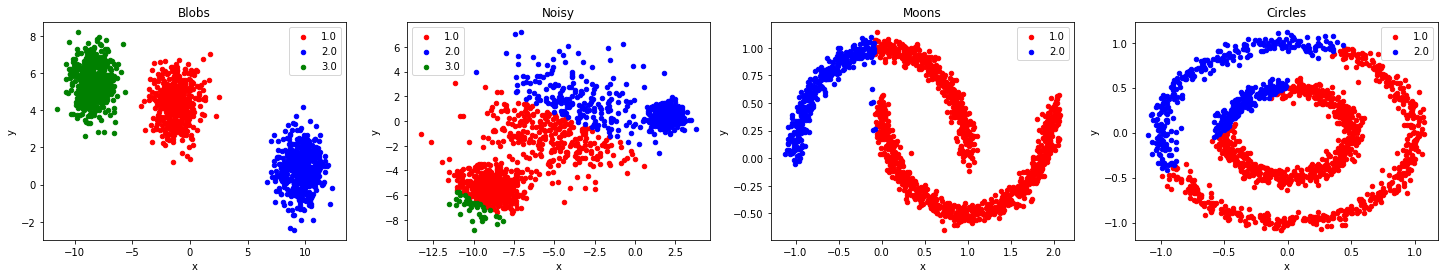

In [147]:


fig, axs = plt.subplots(1, 4, figsize = (25, 4))
plt.gray()

for i, ax in enumerate(axs.flat):
    
    grouped = df_lis[i][1].groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
    ax.set_title(df_lis[i][0])

fig.show()

# CURE

In [328]:
class Cluster:
    def __init__(self, point):
        self.points = point
        self.mean = point
        self.representative = point
        
        
    def calculate_mean(self):
        mean_point=np.zeros(self.representative[0].shape)
        for point in self.representative:
            mean_point += point
        return mean_point/len(self.representative)
    
    
    def add_point(self, point,r):
        self.points =np.vstack((self.points,point))
        self.calculate_representative(r)
        self.calculate_mean()
        
        
    def add_classified_point(self,point):
        
        if any(np.equal(self.points,point).all(1))==False:
            self.points =np.vstack((self.points,point))

        
    def calculate_representative(self,r):
        total_points=len(self.points)
        
        if total_points < r:
            self.representative = self.points
        else:
            # Pick the first representative
            seedValue = (random.randrange(sys.maxsize))//2**32
            np.random.seed(seedValue)
            c_index = np.random.randint(low = 0, high = total_points,size = (1))

            index_list=list()

            self.representative = self.points[c_index]
            index_list.append(c_index)

            for i in range(r-1):
                point_a = self.representative[i]
                max_dist = 0
                max_dist_index = 0

                for j in range(total_points):
                    if j in index_list:
                        continue
                    point_b = self.points[c_index]
                    dist= np.dot((point_b - point_a),(point_b - point_a).T)
                    if dist > max_dist:
                        max_dist_index = j
                        max_dist = dist

                self.representative = np.vstack((self.representative,self.points[max_dist_index]))
                index_list.append(max_dist_index)


In [357]:
def get_matrix(clusters,rows,cols):
    points=np.zeros((rows,cols))
    
    for i in range(len(clusters)):
        points[i] = clusters[i].mean
    return points

# P: sampled dataset
# k: cluster number
# r: qty of representative point
def cure(P,k,r):
    data_points = P.copy()
    data_points_rows, data_points_cols=data_points.shape


    # Create initial clusters
    tree = neighbors.KDTree(data_points,data_points_cols)
    dist, ind = tree.query(data_points,k=data_points_rows)

    points=ind[:,0]

    clusters=list()

    for i in range(points.shape[0]):
        cluster = Cluster(data_points[i,:])
        clusters.append(cluster)

    while len(clusters) > k:

        # Get cluster with min_distance
        dist = np.delete(dist,0, 1)
        ind = np.delete(ind,0, 1)


        # closest point
        result = np.where(dist == np.amin(dist))
        listOfCordinates = list(zip(result[0], result[1]))

        for cord in listOfCordinates:
            u=cord[0]                # min cluster
            v=ind[cord]              # closest point
            break

        u_cluster = clusters[u]
        v_cluster = clusters[v]


        # merge
        u_cluster.add_point(v_cluster.points,r)


        # remove closest point
        clusters.remove(v_cluster)

        data_points = get_matrix(clusters, len(clusters), data_points_cols)
        data_points_rows, data_points_cols = data_points.shape

        # renew
        tree = neighbors.KDTree(data_points,data_points_cols)
        dist, ind = tree.query(data_points,k = data_points_rows)

        
    return clusters


# TODO: Evaluate for representatives
# Classify all other points
def labeling_cure(data,clusters):
    k=len(clusters)
    data_points_rows, data_points_cols = data.shape
    
    for point in data:

        min_distance=np.inf

        for i in range(k):
            mean_point = clusters[i].mean
            distance = np.dot((point - mean_point),(point - mean_point).T)
            if distance < min_distance:
                min_index=i
                min_distance=distance
                
        clusters[min_index].add_classified_point(point)
        
    count = 0
    pp=np.zeros((1,3))
    for cluster in clusters:
        label = np.matrix(np.ones((cluster.points.shape[0],1)) + count)
        t_points = np.hstack((cluster.points,label))
        pp =  np.vstack((pp,t_points))
        count+=1

    pp=pp[~(pp==0).all(1).A1]
    
    return pp


def filter_list(full_list, excludes):
    return [x for x in full_list if x not in excludes]



In [366]:

k = 3
r = 150
sample_size = 1000


blobs_data   = np.matrix(df_blobs[['x','y']].copy())
varied_data  = np.matrix(df_varied[['x','y']].copy())
moons_data   = np.matrix(df_moons[['x','y']].copy())
circles_data = np.matrix(df_circles[['x','y']].copy())


# random sampling
blobs_sampled_t = random.sample(blobs_data.tolist(),sample_size)
blobs_sampled = np.vstack(blobs_sampled_t)
blobs_data = np.vstack(filter_list(blobs_data.tolist(),blobs_sampled_t))    


varied_sampled_t = random.sample(varied_data.tolist(),sample_size)
varied_sampled = np.vstack(varied_sampled_t)
varied_data = np.vstack(filter_list(varied_data.tolist(),varied_sampled_t))    

moons_sampled_t = random.sample(moons_data.tolist(),sample_size)
moons_sampled = np.vstack(moons_sampled_t)
moons_data = np.vstack(filter_list(moons_data.tolist(),moons_sampled_t))    

circles_sampled_t = random.sample(circles_data.tolist(),sample_size)
circles_sampled = np.vstack(circles_sampled_t)
circles_data = np.vstack(filter_list(circles_data.tolist(),circles_sampled_t))    


blobs_points   = labeling_cure( blobs_data  , cure(blobs_sampled  ,3,r))
varied_points  = labeling_cure( varied_data , cure(varied_sampled ,3,r))
moons_points   = labeling_cure( moons_data  , cure(moons_sampled  ,2,r))
circles_points = labeling_cure( circles_data, cure(circles_sampled,2,r))


rows = blobs_points.shape[0]


result_blobs = DataFrame(data = blobs_points,
                            index=RangeIndex(0, blobs_points.shape[0]),
                            columns=["x", "y","label"])


result_varied = DataFrame(data = varied_points,
                            index=RangeIndex(0, varied_points.shape[0]),
                            columns=["x", "y","label"])

result_moons = DataFrame(data = moons_points,
                            index=RangeIndex(0, moons_points.shape[0]),
                            columns=["x", "y","label"])


result_circles = DataFrame(data = circles_points,
                            index=RangeIndex(0, circles_points.shape[0]),
                            columns=["x", "y","label"])

df_lis=list()
# df_lis.append(["Original", df_blobs])
df_lis.append(["Blobs"   , result_blobs])
df_lis.append(["Noisy"   , result_varied])
df_lis.append(["Moons"   , result_moons])
df_lis.append(["Circles" , result_circles])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


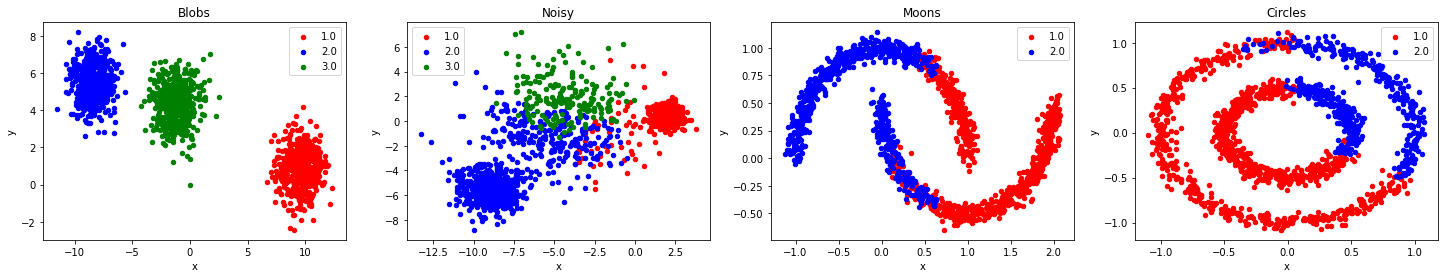

In [367]:
fig, axs = plt.subplots(1, 4, figsize = (25, 4))
plt.gray()

for i, ax in enumerate(axs.flat):
    
    grouped = df_lis[i][1].groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
    ax.set_title(df_lis[i][0])

fig.show()



# DBSCAN

In [485]:

#Define label for differnt point group
NOISE = 0
UNASSIGNED = 0
core=-1
edge=-2



#function to find all neigbors
def neighbor_points(data, pointId, radius):
    points = []
    for i in range(len(data)):
        #Euclidian distance using L2 Norm
        if np.linalg.norm(data[i] - data[pointId]) <= radius:
            points.append(i)
    return points


def dbscan(data, Eps, MinPt):
    pointlabel  = [UNASSIGNED] * len(data)
    pointcount = []
    
    #initilize list for core/noncore point
    corepoint=[]
    noncore=[]
    
    #Find all neigbor for all point
    for i in range(len(data)):
        pointcount.append(neighbor_points(train,i,Eps))
    
    #Find all core point, edgepoint and noise
    for i in range(len(pointcount)):
        if (len(pointcount[i])>=MinPt):
            pointlabel[i]=core
            corepoint.append(i)
        else:
            noncore.append(i)

    for i in noncore:
        for j in pointcount[i]:
            if j in corepoint:
                pointlabel[i]=edge

                break
            
    #start assigning point to cluster
    cl = 1
    #Using a Queue to put all neigbor core point in queue and find neigboir's neigbor
    for i in range(len(pointlabel)):
        q = queue.Queue()
        if (pointlabel[i] == core):
            pointlabel[i] = cl
            for x in pointcount[i]:
                if(pointlabel[x]==core):
                    q.put(x)
                    pointlabel[x]=cl
                elif(pointlabel[x]==edge):
                    pointlabel[x]=cl
            #Stop when all point in Queue has been checked   
            while not q.empty():
                neighbors = pointcount[q.get()]
                for y in neighbors:
                    if (pointlabel[y]==core):
                        pointlabel[y]=cl
                        q.put(y)
                    if (pointlabel[y]==edge):
                        pointlabel[y]=cl            
            cl=cl+1 
           
    return pointlabel,cl
    
#Function to plot final result
def plotRes(data, clusterRes, clusterNum):
    nPoints = len(data)
    scatterColors = ['blue', 'red', 'brown', 'green', 'purple', 'orange', 'yellow']
    for i in range(clusterNum):
        if (i==0):
            color='black'
        else:
            color = scatterColors[i % len(scatterColors)]
        x1 = [];  y1 = []
        for j in range(nPoints):
            if clusterRes[j] == i:
                x1.append(data[j, 0])
                y1.append(data[j, 1])
        plt.scatter(x1, y1, c=color, alpha=1, marker='.')

In [477]:

blobs_data   = np.matrix(df_blobs[['x','y']].copy())
varied_data  = np.matrix(df_varied[['x','y']].copy())
moons_data   = np.matrix(df_moons[['x','y']].copy())
circles_data = np.matrix(df_circles[['x','y']].copy())


Set eps = 0.1, Minpoints = 5


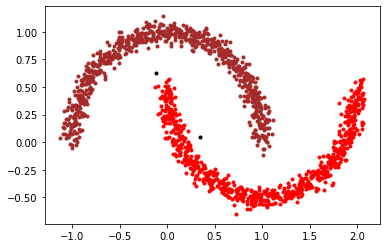

number of cluster found: 2
Counter({2: 750, 1: 748, 0: 2})
numbrer of outliers found: 2

Set eps = 0.1, Minpoints = 10


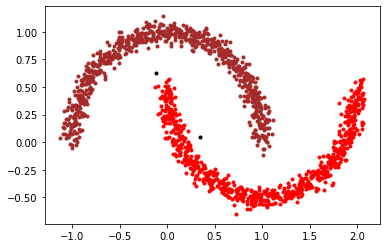

number of cluster found: 2
Counter({2: 750, 1: 748, 0: 2})
numbrer of outliers found: 2

Set eps = 0.1, Minpoints = 15


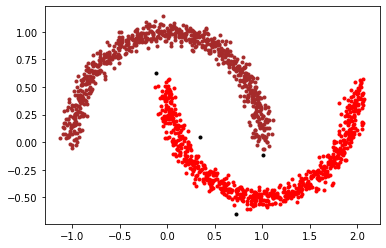

number of cluster found: 2
Counter({2: 749, 1: 747, 0: 4})
numbrer of outliers found: 4

Set eps = 0.1, Minpoints = 20


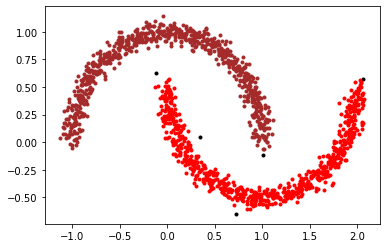

number of cluster found: 2
Counter({2: 749, 1: 746, 0: 5})
numbrer of outliers found: 5

Set eps = 0.25, Minpoints = 5


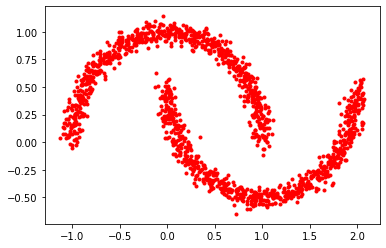

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 0.25, Minpoints = 10


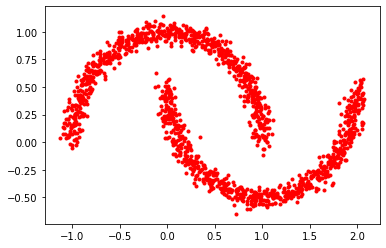

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 0.25, Minpoints = 15


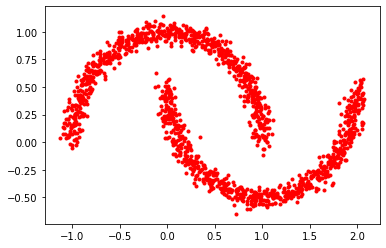

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 0.25, Minpoints = 20


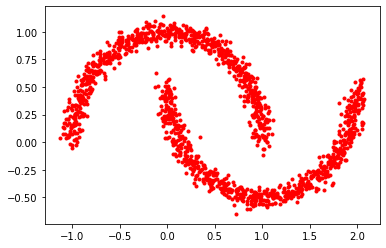

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 0.5, Minpoints = 5


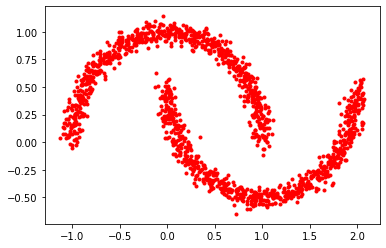

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 0.5, Minpoints = 10


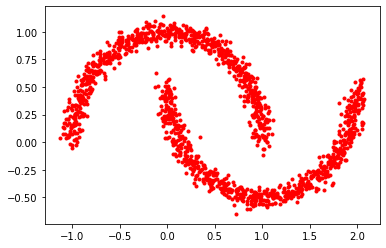

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 0.5, Minpoints = 15


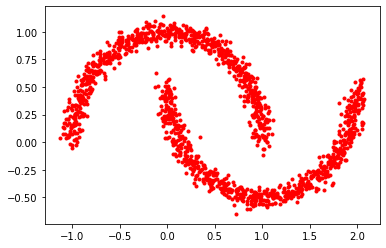

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 0.5, Minpoints = 20


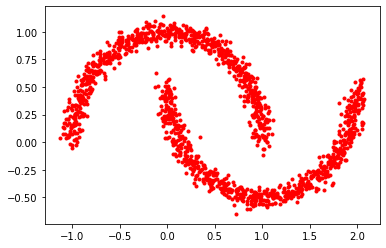

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 0.75, Minpoints = 5


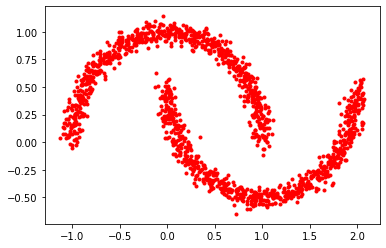

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 0.75, Minpoints = 10


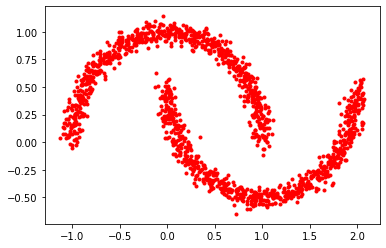

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 0.75, Minpoints = 15


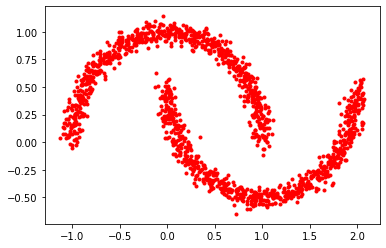

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 0.75, Minpoints = 20


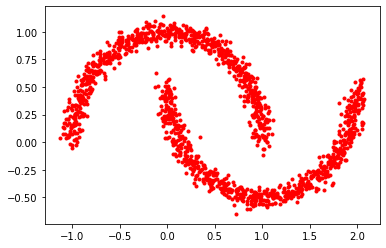

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 0.6, Minpoints = 5


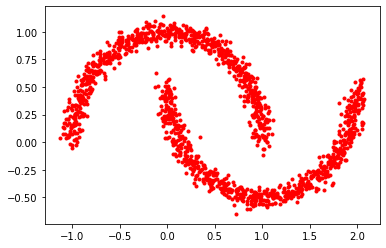

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 0.6, Minpoints = 10


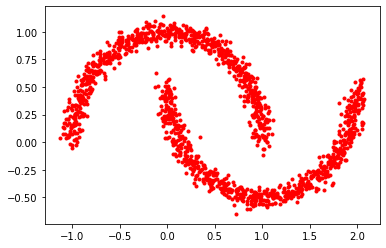

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 0.6, Minpoints = 15


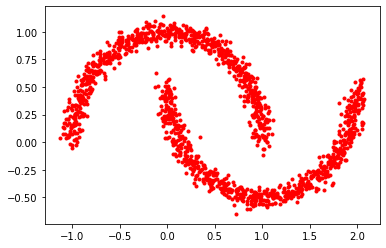

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 0.6, Minpoints = 20


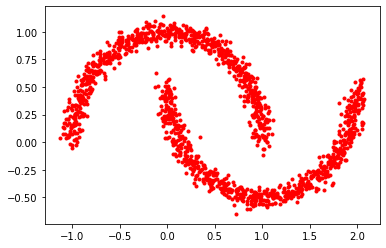

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 3, Minpoints = 5


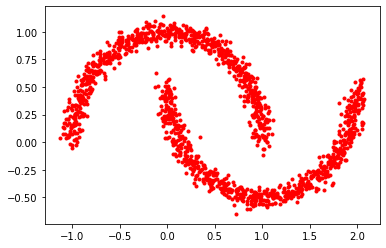

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 3, Minpoints = 10


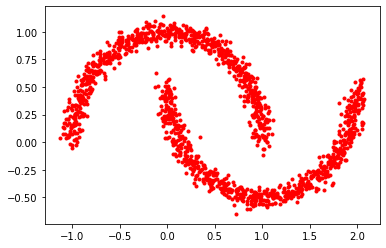

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 3, Minpoints = 15


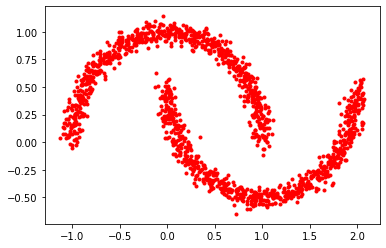

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 3, Minpoints = 20


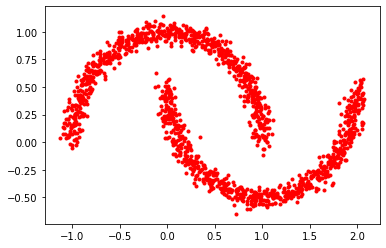

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 5, Minpoints = 5


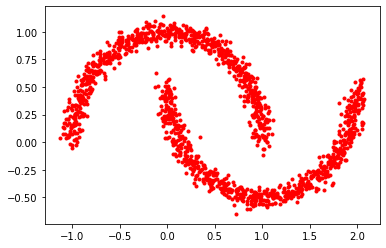

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 5, Minpoints = 10


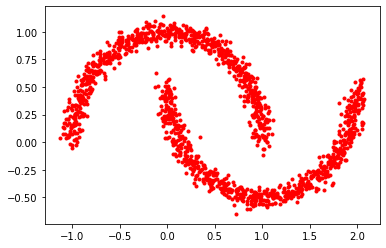

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 5, Minpoints = 15


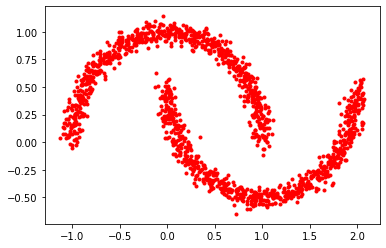

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 5, Minpoints = 20


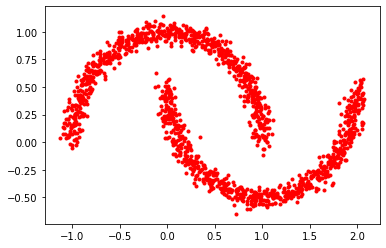

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 10, Minpoints = 5


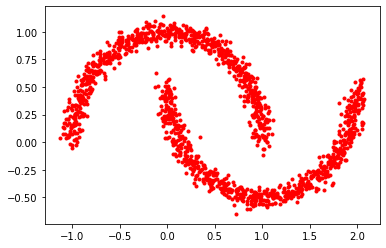

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 10, Minpoints = 10


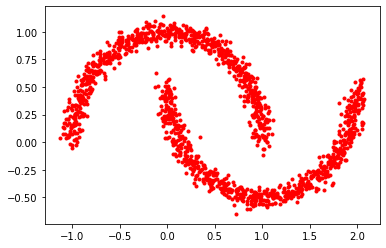

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 10, Minpoints = 15


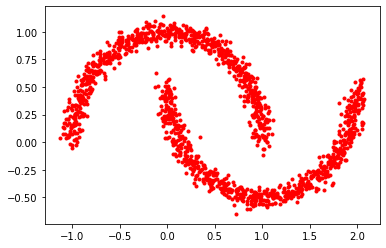

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 10, Minpoints = 20


KeyboardInterrupt: 

In [481]:

#Load Data
train = moons_data


#Set EPS and Minpoint
epss = [0.1, 0.25, 0.5, 0.75, 0.6, 3, 5,10]
minptss = [5,10,15,20]
# Find ALl cluster, outliers in different setting and print resultsw
for eps in epss:
    for minpts in minptss:
        print('Set eps = ' +str(eps)+ ', Minpoints = '+str(minpts))
        pointlabel,cl = dbscan(train,eps,minpts)
        plotRes(train, pointlabel, cl)
        plt.show()
        print('number of cluster found: ' + str(cl-1))
        counter=collections.Counter(pointlabel)
        print(counter)
        outliers  = pointlabel.count(0)
        print('numbrer of outliers found: '+str(outliers) +'\n')

Set eps = 0.1, Minpoints = 5


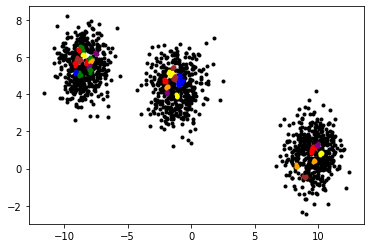

number of cluster found: 30
Counter({0: 1287, 8: 15, 6: 15, 9: 12, 17: 12, 7: 9, 2: 8, 15: 8, 13: 7, 1: 7, 23: 7, 10: 7, 16: 7, 25: 7, 3: 6, 4: 6, 21: 6, 11: 6, 14: 6, 24: 6, 18: 6, 26: 5, 5: 5, 29: 5, 22: 5, 30: 5, 12: 5, 27: 5, 19: 5, 20: 5, 28: 5})
numbrer of outliers found: 1287

Set eps = 0.1, Minpoints = 10


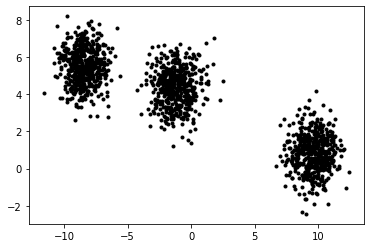

number of cluster found: 0
Counter({0: 1500})
numbrer of outliers found: 1500

Set eps = 0.1, Minpoints = 15


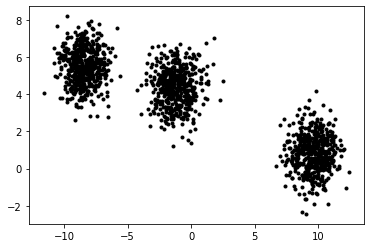

number of cluster found: 0
Counter({0: 1500})
numbrer of outliers found: 1500

Set eps = 0.1, Minpoints = 20


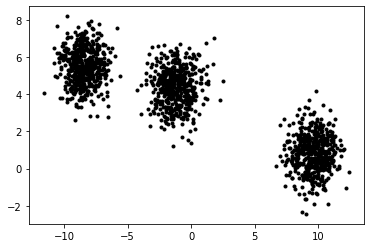

number of cluster found: 0
Counter({0: 1500})
numbrer of outliers found: 1500

Set eps = 0.25, Minpoints = 5


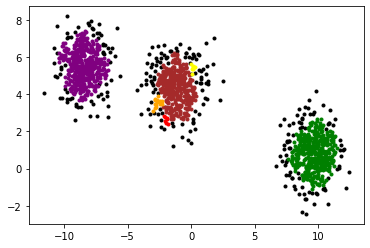

number of cluster found: 6
Counter({4: 431, 3: 416, 2: 369, 0: 253, 5: 16, 6: 8, 1: 7})
numbrer of outliers found: 253

Set eps = 0.25, Minpoints = 10


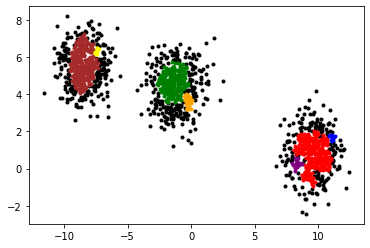

number of cluster found: 8
Counter({0: 599, 1: 289, 2: 287, 3: 253, 5: 24, 4: 21, 6: 10, 7: 10, 8: 7})
numbrer of outliers found: 599

Set eps = 0.25, Minpoints = 15


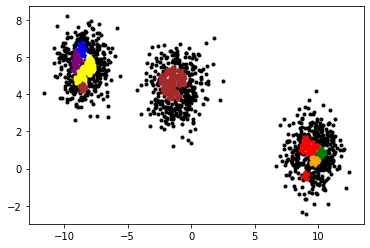

number of cluster found: 9
Counter({0: 972, 2: 197, 6: 97, 1: 78, 4: 52, 7: 28, 3: 24, 5: 22, 9: 15, 8: 15})
numbrer of outliers found: 972

Set eps = 0.25, Minpoints = 20


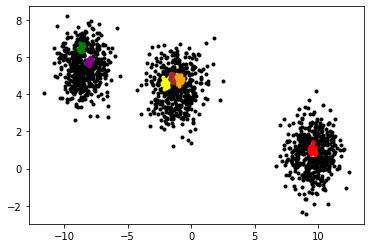

number of cluster found: 6
Counter({0: 1343, 1: 33, 2: 28, 6: 27, 5: 27, 4: 22, 3: 20})
numbrer of outliers found: 1343

Set eps = 0.5, Minpoints = 5


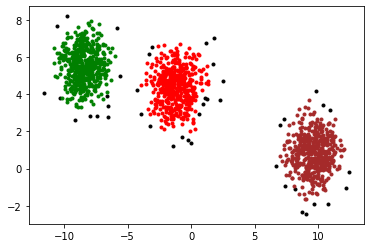

number of cluster found: 3
Counter({3: 488, 2: 486, 1: 482, 0: 44})
numbrer of outliers found: 44

Set eps = 0.5, Minpoints = 10


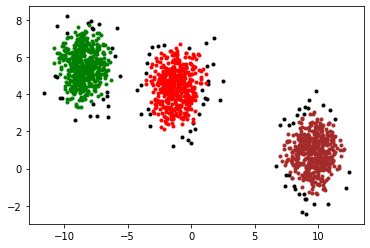

number of cluster found: 3
Counter({3: 474, 2: 470, 1: 467, 0: 89})
numbrer of outliers found: 89

Set eps = 0.5, Minpoints = 15


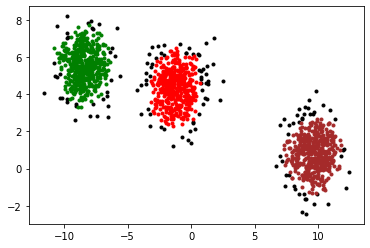

number of cluster found: 3
Counter({3: 464, 2: 457, 1: 442, 0: 137})
numbrer of outliers found: 137

Set eps = 0.5, Minpoints = 20


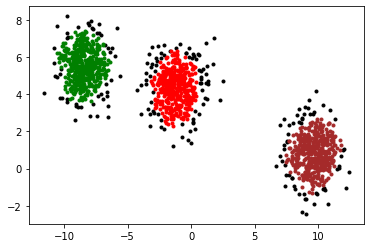

number of cluster found: 3
Counter({3: 450, 2: 442, 1: 422, 0: 186})
numbrer of outliers found: 186

Set eps = 0.75, Minpoints = 5


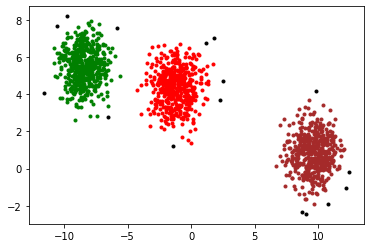

number of cluster found: 3
Counter({1: 495, 3: 495, 2: 494, 0: 16})
numbrer of outliers found: 16

Set eps = 0.75, Minpoints = 10


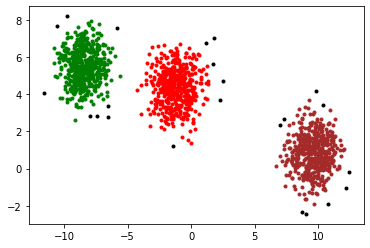

number of cluster found: 3
Counter({1: 494, 3: 492, 2: 491, 0: 23})
numbrer of outliers found: 23

Set eps = 0.75, Minpoints = 15


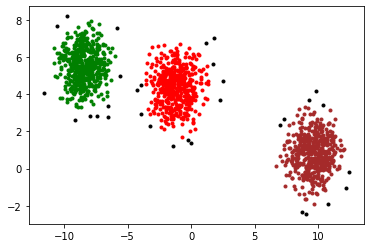

number of cluster found: 3
Counter({2: 490, 3: 490, 1: 488, 0: 32})
numbrer of outliers found: 32

Set eps = 0.75, Minpoints = 20


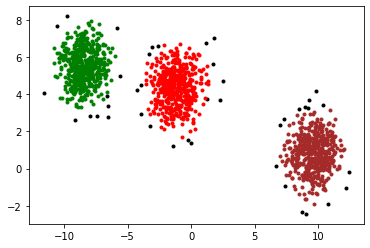

number of cluster found: 3
Counter({3: 489, 2: 485, 1: 484, 0: 42})
numbrer of outliers found: 42

Set eps = 0.6, Minpoints = 5


KeyboardInterrupt: 

In [482]:
#Load Data
train = blobs_data


#Set EPS and Minpoint
epss = [0.1, 0.25, 0.5, 0.75, 0.6, 3, 5,10]
minptss = [5,10,15,20]
# Find ALl cluster, outliers in different setting and print resultsw
for eps in epss:
    for minpts in minptss:
        print('Set eps = ' +str(eps)+ ', Minpoints = '+str(minpts))
        pointlabel,cl = dbscan(train,eps,minpts)
        plotRes(train, pointlabel, cl)
        plt.show()
        print('number of cluster found: ' + str(cl-1))
        counter=collections.Counter(pointlabel)
        print(counter)
        outliers  = pointlabel.count(0)
        print('numbrer of outliers found: '+str(outliers) +'\n')

Set eps = 0.1, Minpoints = 5


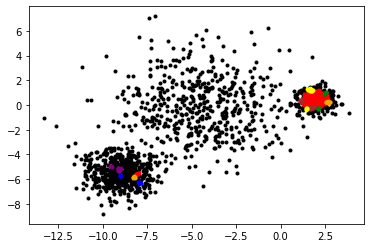

number of cluster found: 14
Counter({0: 1081, 1: 313, 2: 17, 6: 15, 4: 13, 5: 10, 8: 7, 9: 7, 7: 6, 10: 6, 14: 5, 3: 5, 12: 5, 13: 5, 11: 5})
numbrer of outliers found: 1081

Set eps = 0.1, Minpoints = 10


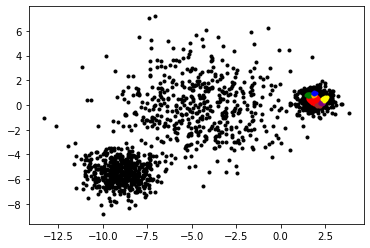

number of cluster found: 7
Counter({0: 1309, 1: 117, 3: 18, 6: 18, 4: 12, 2: 10, 5: 9, 7: 7})
numbrer of outliers found: 1309

Set eps = 0.1, Minpoints = 15


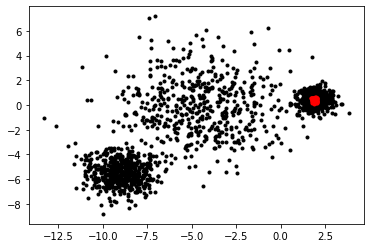

number of cluster found: 1
Counter({0: 1424, 1: 76})
numbrer of outliers found: 1424

Set eps = 0.1, Minpoints = 20


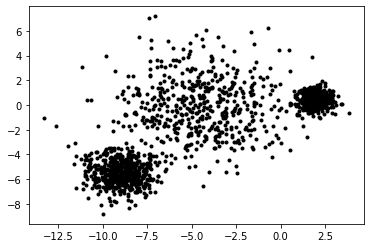

number of cluster found: 0
Counter({0: 1500})
numbrer of outliers found: 1500

Set eps = 0.25, Minpoints = 5


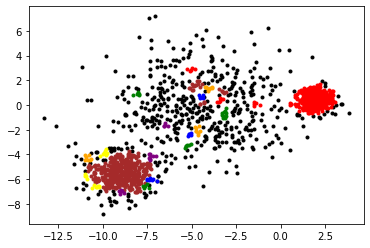

number of cluster found: 24
Counter({0: 486, 1: 484, 2: 386, 16: 14, 3: 10, 12: 8, 5: 8, 6: 8, 18: 8, 19: 7, 13: 7, 21: 7, 9: 6, 8: 6, 17: 6, 4: 5, 23: 5, 7: 5, 15: 5, 10: 5, 11: 5, 22: 5, 14: 5, 24: 5, 20: 4})
numbrer of outliers found: 486

Set eps = 0.25, Minpoints = 10


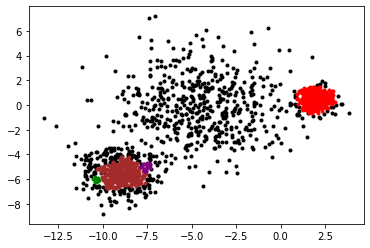

number of cluster found: 4
Counter({0: 719, 1: 468, 2: 282, 4: 21, 3: 10})
numbrer of outliers found: 719

Set eps = 0.25, Minpoints = 15


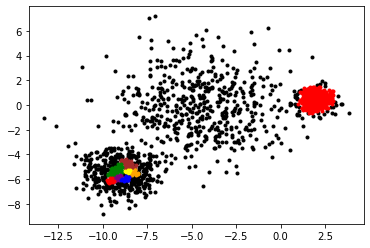

number of cluster found: 8
Counter({0: 887, 1: 460, 3: 47, 2: 41, 7: 16, 4: 15, 5: 15, 8: 13, 6: 6})
numbrer of outliers found: 887

Set eps = 0.25, Minpoints = 20


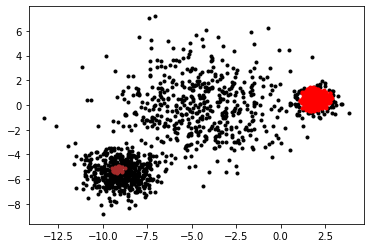

number of cluster found: 2
Counter({0: 1035, 1: 434, 2: 31})
numbrer of outliers found: 1035

Set eps = 0.5, Minpoints = 5


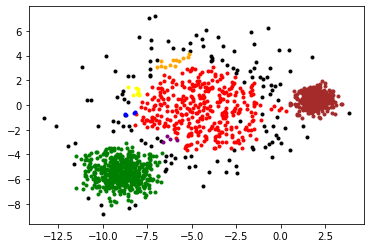

number of cluster found: 8
Counter({2: 504, 3: 492, 1: 342, 0: 129, 5: 12, 6: 8, 8: 5, 4: 4, 7: 4})
numbrer of outliers found: 129

Set eps = 0.5, Minpoints = 10


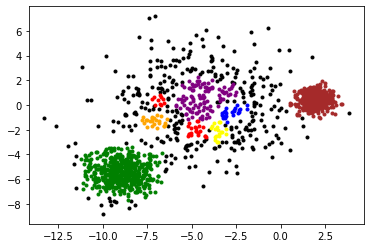

number of cluster found: 8
Counter({2: 503, 3: 483, 0: 312, 4: 104, 5: 24, 7: 23, 1: 22, 6: 19, 8: 10})
numbrer of outliers found: 312

Set eps = 0.5, Minpoints = 15


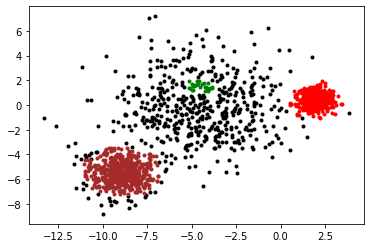

number of cluster found: 3
Counter({0: 510, 1: 503, 2: 461, 3: 26})
numbrer of outliers found: 510

Set eps = 0.5, Minpoints = 20


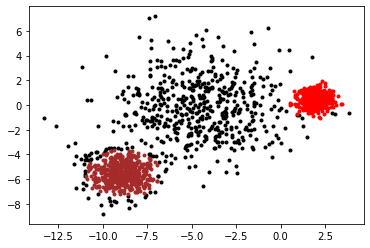

number of cluster found: 2
Counter({0: 565, 1: 499, 2: 436})
numbrer of outliers found: 565

Set eps = 0.75, Minpoints = 5


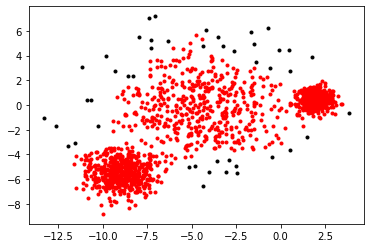

number of cluster found: 1
Counter({1: 1455, 0: 45})
numbrer of outliers found: 45

Set eps = 0.75, Minpoints = 10


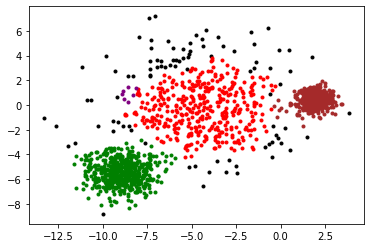

number of cluster found: 4
Counter({2: 511, 3: 506, 1: 385, 0: 91, 4: 7})
numbrer of outliers found: 91

Set eps = 0.75, Minpoints = 15


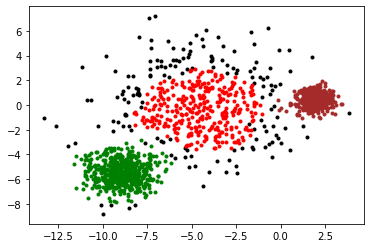

number of cluster found: 3
Counter({2: 508, 3: 500, 1: 332, 0: 160})
numbrer of outliers found: 160

Set eps = 0.75, Minpoints = 20


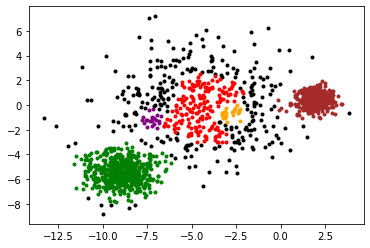

number of cluster found: 5
Counter({2: 508, 3: 497, 0: 269, 1: 183, 5: 22, 4: 21})
numbrer of outliers found: 269

Set eps = 0.6, Minpoints = 5


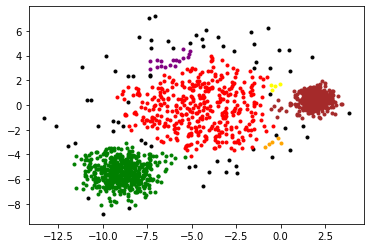

number of cluster found: 6
Counter({2: 511, 3: 503, 1: 392, 0: 68, 4: 17, 5: 5, 6: 4})
numbrer of outliers found: 68

Set eps = 0.6, Minpoints = 10


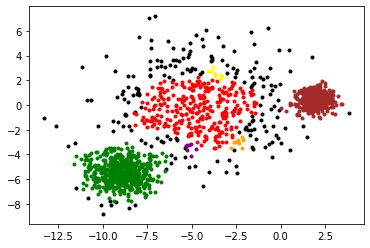

number of cluster found: 6
Counter({2: 506, 3: 492, 1: 288, 0: 190, 4: 8, 6: 8, 5: 8})
numbrer of outliers found: 190

Set eps = 0.6, Minpoints = 15


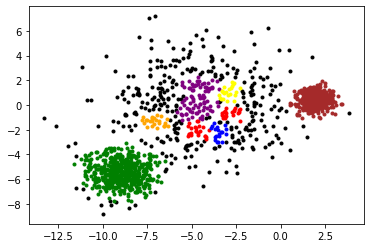

number of cluster found: 8
Counter({2: 504, 3: 486, 0: 314, 4: 85, 5: 25, 1: 24, 6: 23, 8: 20, 7: 19})
numbrer of outliers found: 314

Set eps = 0.6, Minpoints = 20


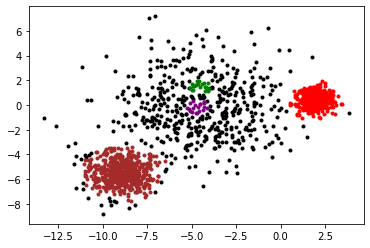

number of cluster found: 4
Counter({1: 504, 0: 480, 2: 475, 3: 21, 4: 20})
numbrer of outliers found: 480

Set eps = 3, Minpoints = 5


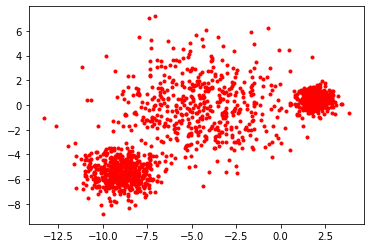

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 3, Minpoints = 10


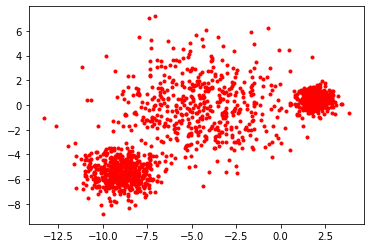

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 3, Minpoints = 15


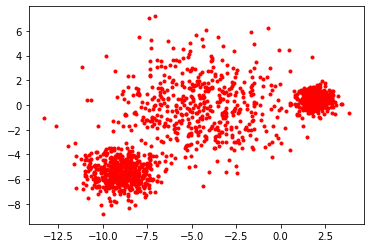

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 3, Minpoints = 20


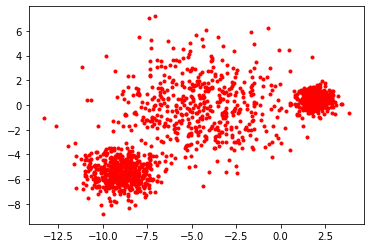

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 5, Minpoints = 5


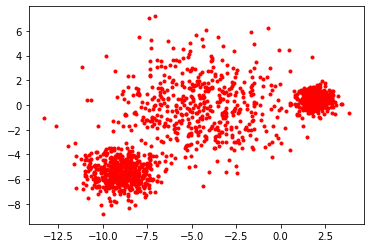

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 5, Minpoints = 10


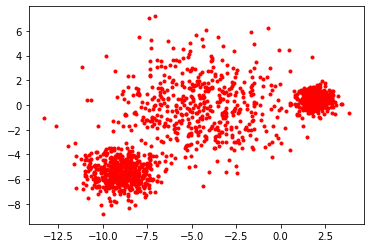

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 5, Minpoints = 15


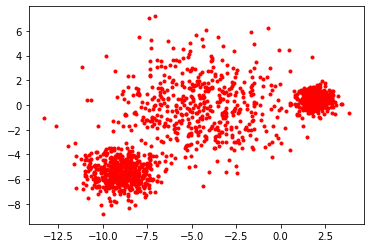

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 5, Minpoints = 20


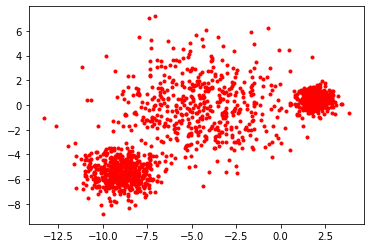

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0

Set eps = 10, Minpoints = 5


KeyboardInterrupt: 

In [483]:
#Load Data
train = varied_data


#Set EPS and Minpoint
epss = [0.1, 0.25, 0.5, 0.75, 0.6, 3, 5,10]
minptss = [5,10,15,20]
# Find ALl cluster, outliers in different setting and print resultsw
for eps in epss:
    for minpts in minptss:
        print('Set eps = ' +str(eps)+ ', Minpoints = '+str(minpts))
        pointlabel,cl = dbscan(train,eps,minpts)
        plotRes(train, pointlabel, cl)
        plt.show()
        print('number of cluster found: ' + str(cl-1))
        counter=collections.Counter(pointlabel)
        print(counter)
        outliers  = pointlabel.count(0)
        print('numbrer of outliers found: '+str(outliers) +'\n')

Set eps = 0.1, Minpoints = 5


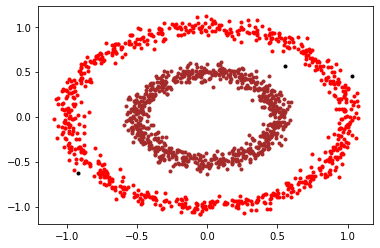

number of cluster found: 2
Counter({2: 750, 1: 747, 0: 3})
numbrer of outliers found: 3

Set eps = 0.1, Minpoints = 10


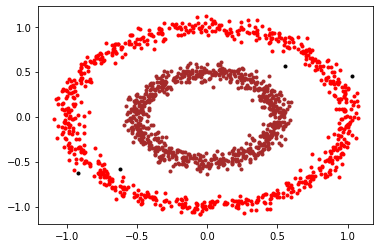

number of cluster found: 2
Counter({2: 750, 1: 746, 0: 4})
numbrer of outliers found: 4

Set eps = 0.1, Minpoints = 15


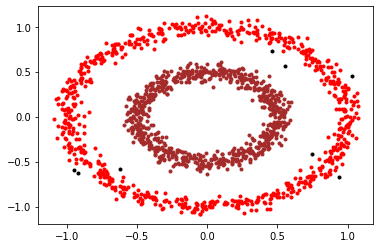

number of cluster found: 2
Counter({2: 750, 1: 742, 0: 8})
numbrer of outliers found: 8

Set eps = 0.1, Minpoints = 20


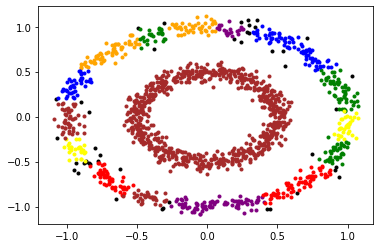

number of cluster found: 17
Counter({2: 750, 7: 81, 11: 81, 5: 61, 3: 58, 1: 50, 16: 47, 0: 45, 8: 44, 12: 42, 14: 42, 10: 36, 6: 35, 9: 32, 13: 28, 17: 26, 15: 22, 4: 20})
numbrer of outliers found: 45

Set eps = 0.25, Minpoints = 5


KeyboardInterrupt: 

In [484]:
#Load Data
train = circles_data


#Set EPS and Minpoint
epss = [0.1, 0.25, 0.5, 0.75, 0.6, 3, 5,10]
minptss = [5,10,15,20]
# Find ALl cluster, outliers in different setting and print resultsw
for eps in epss:
    for minpts in minptss:
        print('Set eps = ' +str(eps)+ ', Minpoints = '+str(minpts))
        pointlabel,cl = dbscan(train,eps,minpts)
        plotRes(train, pointlabel, cl)
        plt.show()
        print('number of cluster found: ' + str(cl-1))
        counter=collections.Counter(pointlabel)
        print(counter)
        outliers  = pointlabel.count(0)
        print('numbrer of outliers found: '+str(outliers) +'\n')